In [1]:
import pandas as pd
import numpy as np
import json
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
from nltk.tokenize import RegexpTokenizer
from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
from sklearn.feature_extraction import text as sktext
from sklearn import preprocessing as skp
from keras import callbacks as kc
from keras import optimizers as ko
from keras import initializers, regularizers, constraints
from keras.engine import Layer
import keras.backend as K
from sklearn.metrics import f1_score
from keras.utils.vis_utils import model_to_dot
from keras import models
from keras import layers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.initializers import Constant
%matplotlib inline

Using TensorFlow backend.


In [2]:
with open('tweet_data.json', 'r') as f:
    tweet_data = json.load(f)

In [3]:
len(tweet_data.keys())

3475

In [4]:
with open('deepwalk_embs.json', 'r') as f:
    deepwalk_embs = json.load(f)

In [5]:
tweet_data['929479629840281601']

{'created_at': 'Sat Nov 11 22:43:07 +0000 2017',
 'id': 929479629840281601,
 'id_str': '929479629840281601',
 'full_text': 'I am Muhajir .. Aur mere lye sab se Pehly Pakistan he .. agr 10 lakh Altaf Jese leaders bh is zameen ki behurmati kren un sbko sar e aam phansi Deni chahye .. Proud to be a #Muhajir and #Pakistani',
 'truncated': False,
 'display_text_range': [0, 196],
 'entities': {'hashtags': [{'text': 'Muhajir', 'indices': [173, 181]},
   {'text': 'Pakistani', 'indices': [186, 196]}],
  'symbols': [],
  'user_mentions': [],
  'urls': []},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1615850780,
  'id_str': '1615850780',
  'name': 'Sumair Khan',
  'screen_name': 'sumair_sk',
  'location': ' Karachi',
  'description': 'Electronic Engineer, Hafiz E 

In [6]:
id_emb_map = {}

In [7]:
for ix in tweet_data:
    u_id = tweet_data[ix]['user']['id']
    emb = deepwalk_embs[str(u_id)]
    id_emb_map[ix] = emb

In [8]:
len(id_emb_map)

3475

In [9]:
label_data = pd.read_csv('final_data.csv')

In [10]:
label_data.head()

,Unnamed: 0,label,user,tweet,emb,text,lemmas
0,0,0,1615850780,929479629840281601,[ 0.00447152 -0.00207724 -0.00693714 -0.005786...,I am a young person and I am quite open to Pak...,i be muhajir aur mere lye sab se pehly pakista...
1,1,0,903075788756590593,929467030406758400,[ 0.00511213 0.0066199 -0.00406399 -0.001209...,<User> <User> Doctor Subhash ke PhD in Het Pol...,<user> <user> doctor sab sahi me ke phd in hat...
2,2,1,881096476616781825,929460995981901825,[-0.6831904 2.609242 2.6378176 2.580363...,"After the formation of the government, a singl...",<user> sarkar banne ke bad hindu hit me ek bhi...
3,3,1,3268145264,929460432498233344,[ 1.6771747 0.14684932 -0.8186511 1.882037...,Hate it when the test is not so frozen,hate it jab test ata ho phr bh acha na ho
4,4,0,763212669524467712,929459222697431040,[ 1.1214749 3.8859344 3.6560123 2.660346...,<user> One of the victims has been raped and r...,<user> ek dil ek jaan akal ke imitihaan kal kp...


In [11]:
label_data.shape

(3475, 7)

In [12]:
embs = []
labels = []
tweets = []

In [13]:
for ix in range(label_data.shape[0]):
    user = str(label_data['user'].iloc[ix])
    tweet = label_data['text'].iloc[ix]
    label = label_data['label'].iloc[ix]
    if user in deepwalk_embs:
        embs.append(deepwalk_embs[user])
        cur = label
        labels.append(cur)
        tweets.append(tweet)

In [14]:
labels = np.array(labels)
embs = np.array(embs)
tweets = np.array(tweets)

In [15]:
labels.shape, embs.shape, tweets.shape

((3475,), (3475, 64), (3475,))

In [16]:
np.save('deepwalk_embs_final.npy', embs)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
import os
from keras.utils import np_utils
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle

In [43]:
model = Sequential()
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add( Dropout(0.4) )
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
labels = np_utils.to_categorical(labels)
labels.shape

(3475, 2)

In [45]:
model.fit( embs, labels, validation_split=0.2, shuffle=True, epochs=10 )

W0815 19:26:42.622525 4624610752 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 19:26:42.629787 4624610752 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0815 19:26:42.783751 4624610752 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0815 19:26:42.893162 4624610752 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updati

Train on 2780 samples, validate on 695 samples
Epoch 1/10
2780/2780 [==============================] - 2s 646us/step - loss: 0.6830 - acc: 0.6072 - val_loss: 0.6484 - val_acc: 0.6647
Epoch 2/10
2780/2780 [==============================] - 0s 90us/step - loss: 0.6634 - acc: 0.6219 - val_loss: 0.6421 - val_acc: 0.6619
Epoch 3/10
2780/2780 [==============================] - 0s 87us/step - loss: 0.6539 - acc: 0.6331 - val_loss: 0.6496 - val_acc: 0.6460
Epoch 4/10
2780/2780 [==============================] - 0s 91us/step - loss: 0.6489 - acc: 0.6338 - val_loss: 0.6396 - val_acc: 0.6619
Epoch 5/10
2780/2780 [==============================] - 0s 143us/step - loss: 0.6409 - acc: 0.6406 - val_loss: 0.6433 - val_acc: 0.6403
Epoch 6/10
2780/2780 [==============================] - 0s 110us/step - loss: 0.6326 - acc: 0.6457 - val_loss: 0.6552 - val_acc: 0.6273
Epoch 7/10
2780/2780 [==============================] - 0s 84us/step - loss: 0.6277 - acc: 0.6464 - val_loss: 0.6479 - val_acc: 0.6417
Epoch

In [46]:
from sklearn.metrics import f1_score

In [47]:
from sklearn.metrics import classification_report

In [48]:
pred_val = model.predict(embs[3000:])

In [49]:
pred_val = pred_val.argmax(axis=1)

In [50]:
true = labels[3000:,1]

In [51]:
final = pd.DataFrame()
final['true'] = true.astype(int)
final['pred'] = pred_val.astype(int)

In [60]:
print(classification_report(final['true'],final['pred']))

              precision    recall  f1-score   support

           0       0.68      0.87      0.77       322
           1       0.36      0.16      0.22       153

    accuracy                           0.64       475
   macro avg       0.52      0.51      0.49       475
weighted avg       0.58      0.64      0.59       475



In [137]:
from sklearn.manifold import TSNE

In [138]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
new_values = tsne_model.fit_transform(embs)

In [139]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

In [142]:
colors = ['red','green']

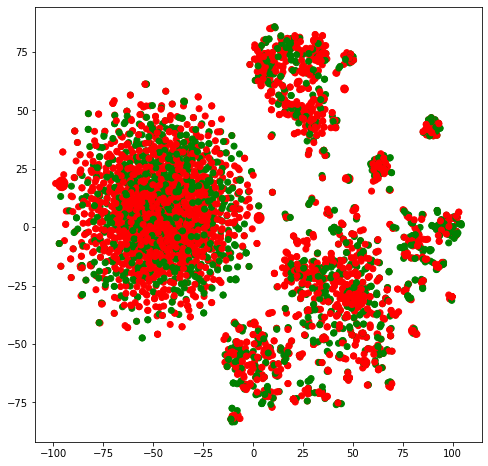

In [143]:
import matplotlib
plt.figure(figsize=(8, 8)) 
plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [93]:
train_df = pd.DataFrame()
train_df['content'] = tweets
train_df['class'] = labels

Training data phrase length distribution


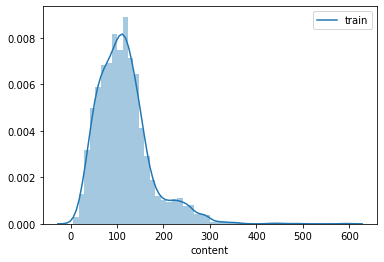

In [96]:
print("Training data phrase length distribution")
sns.distplot(train_df['content'].map(lambda ele: len(ele)), kde_kws={"label": "train"})

In [97]:
print('Most frequent sentence length in training:')
lens = train_df['content'].map(lambda ele: len(ele))
counts = np.bincount(lens)
print(np.argmax(counts))

Most frequent sentence length in training:
119


Testing data phrase length distribution


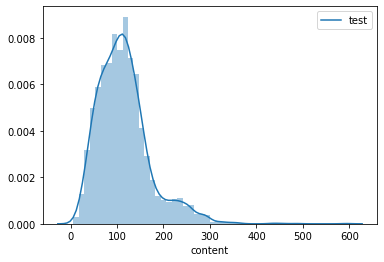

In [98]:
print("Testing data phrase length distribution")
sns.distplot(train_df['content'].map(lambda ele: len(ele)), kde_kws={"label": "test"})

In [99]:
test_df = train_df[3000:]
train_df = train_df[:3000]

Testing data phrase length distribution


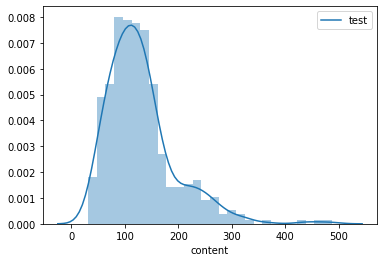

In [100]:
print("Testing data phrase length distribution")
sns.distplot(test_df['content'].map(lambda ele: len(ele)), kde_kws={"label": "test"})

In [101]:
print('Most frequent sentence length in testing:')
lens = test_df['content'].map(lambda ele: len(ele))
counts = np.bincount(lens)
print(np.argmax(counts))

Most frequent sentence length in testing:
131


In [102]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

In [103]:

## A dictionary to map the punctuations present in the text to relevant strings or symbols
punct_mapping = {"‘": "'", 
                 "₹": "e", 
                 "´": "'", 
                 "°": "", 
                 "€": "e", 
                 "™": "tm",
                 "√": " sqrt ",
                 "×": "x",
                 "²": "2",
                 "—": "-",
                 "–": "-",
                 "’": "'",
                 "_": "-",
                 "`": "'",
                 '“': '"',
                 '”': '"',
                 '“': '"',
                 "£": "e",
                 '∞': 'infinity',
                 'θ': 'theta',
                 '÷': '/',
                 'α': 'alpha',
                 '•': '.',
                 'à': 'a',
                 '−': '-',
                 'β': 'beta',
                 '∅': '',
                 '³': '3',
                 'π': 'pi',
                 ',':'',
                 '.':'',
                 ':':'',
                 '(':'',
                 ')':'',
                 '*':'',
                '"':'',
                '<':'',
                '>':''}

In [104]:
def unknown_punct(embed, punct):
    unknown = ''
    for p in punct:
        if p not in embed:
            unknown += p
            unknown += ' '
    return unknown

## Function to remove special characters from the sentences (if any present)
def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  # Other special characters that I have to deal with in last
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

In [105]:
train_df.loc[:, 'content'] = train_df['content'].map(lambda text: clean_special_chars(text, punct, punct_mapping))
test_df.loc[:, 'content'] = test_df['content'].map(lambda text: clean_special_chars(text, punct, punct_mapping))

In [106]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [107]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [108]:
train_df.loc[:, 'content'] = train_df['content'].map(lambda text: clean_contractions(text, contraction_mapping))
test_df.loc[:, 'content'] = test_df['content'].map(lambda text: clean_contractions(text, contraction_mapping))

In [109]:
train_df.loc[:, 'content'] = train_df['content'].map(lambda text: text.lower())
test_df.loc[:, 'content'] = test_df['content'].map(lambda text: text.lower())

In [117]:
data = train_df.values
data_test = test_df.values

In [118]:
X_train = data[:,0]
Y_train = data[:,1]

X_test = data_test[:,0]
Y_test = data_test[:,1]

print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print ("-------------------------")
print (X_test[0], Y_test[0])
print (X_train[0], Y_train[0])

(3000,) (3000,) (475,) (475,)
-------------------------
user the user is not right i do not know when it is time to change such thinking then here is the excitement 0
i am a young person and i am quite open to pakistan but he has ten thousand of whom are the only leaders who have been able to behave in such a way that he does not want to be a terrorist he has to be proud of a hashtag and hashtag 0


In [119]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")
lemmatizer = WordNetLemmatizer()

In [120]:
for ix in range(X_train.shape[0]):
    X_train[ix] = tokenizer.tokenize(X_train[ix])
    X_train[ix] = [lemmatizer.lemmatize(i) for i in X_train[ix]]
    
for ix in range(X_test.shape[0]):
    X_test[ix] = tokenizer.tokenize(X_test[ix])
    X_test[ix] = [lemmatizer.lemmatize(i) for i in X_test[ix]]

In [121]:

unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
## Length of the list of unique_words gives the no of unique words
print("Vocabulary Size:")
print(len(list(unique_words)))
print("Maximum length of sentence:")
print(len_max)

100%|██████████| 3000/3000 [00:00<00:00, 177883.03it/s]

Vocabulary Size:
7042
Maximum length of sentence:
75


In [122]:
len_max = 100

In [123]:
tokenizer_keras = Tokenizer(num_words=len(list(unique_words)))
tokenizer_keras.fit_on_texts(list(X_train))
X_train = tokenizer_keras.texts_to_sequences(X_train)
X_test = tokenizer_keras.texts_to_sequences(X_test)

## Padding done to equalize the lengths of all input reviews. LSTM networks needs all inputs to be same length.
## Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.
X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_test = sequence.pad_sequences(X_test, maxlen=len_max)
print(X_train.shape,X_test.shape)

(3000, 100) (475, 100)


In [124]:
embeddings_index = dict()

In [126]:
f = open('./glove.6B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [127]:
vocab_size=len(list(unique_words))
embedding_matrix = np.zeros((vocab_size+1, 200))
for word, i in tokenizer_keras.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [128]:
print("Vocabulry Size:")
print(vocab_size)

Vocabulry Size:
7042


In [129]:
embed_size = 200
max_features = vocab_size + 1 

In [130]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, Flatten, GlobalAveragePooling1D, Reshape
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers

In [175]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [207]:
# text_input_layer = Input(shape=(len_max,), dtype='int32')
# doc_embedding   = Embedding(len(list(unique_words)),
#                             300,
#                             embeddings_initializer=Constant(embedding_matrix),
#                             input_length=len_max,
#                             trainable=True)(text_input_layer)

# convs = []
# filter_sizes = [4, 5]
# # filter_sizes = [5]

# l_conv = Conv1D(filters=128, kernel_size=[3], padding='valid', activation='relu')(doc_embedding)

# for filter_size in filter_sizes:
#     l_conv = Conv1D(filters=128, kernel_size=filter_size, padding='valid', activation='relu')(l_conv)
#     convs.append(l_conv)
# cnn_feature_maps = convs

# reg_drop = Dropout(0.3)(l_conv)
# flat = Flatten()(reg_drop)
# sentence_encoder1 = Bidirectional(LSTM(128,return_sequences=True))(reg_drop)
# sentence_encoder2 = Bidirectional(LSTM(128,return_sequences=True))(sentence_encoder1)
# att = Attention(91)(sentence_encoder2)
# drop = Dropout(0.3)(att)
# fc_layer =Dense(128, activation="relu")(drop)

# output_layer = Dense(2,activation="softmax")(fc_layer)

# model = Model(inputs=[text_input_layer], outputs=[output_layer])

In [239]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 10)
callback = [early_stopping]

#Model using Keras LSTM
model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
# model.add(Attention(100))
# model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 300)          2112600   
_________________________________________________________________
lstm_19 (LSTM)               (None, 100, 128)          219648    
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               6500      
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 202       
Total params: 2,388,358
Trainable params: 2,388,358
Non-trainable params: 0
_________________________________________________________________


In [240]:
checkpoint=ModelCheckpoint('model_self_embedding_final.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [241]:
output1 = model.layers[-2].output
# dense2 = Dense(300, activation='relu', name='layer_2')(output1)
input4 = Input(shape=(64,))
dense3 = Dense(50, activation='relu', name='layer_3')(input4)
merged = concatenate([output1, dense3])
pre_final = Dense(50, activation='relu', name='pre_final')(merged)
output = layers.Dense(2, activation="softmax", name="softmax_layer0")(pre_final)

In [242]:
model_fin = Model(inputs = [model.input, input4], outputs = [output])

In [243]:
X_full = np.concatenate((X_train, X_test))

In [244]:
Y_full = np.concatenate((Y_train, Y_test))

In [245]:
adam = ko.Nadam()
model_fin.compile(adam, loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy",])

file_path = "comb_model.hdf5"
check_point = kc.ModelCheckpoint(file_path, monitor = "val_sparse_categorical_accuracy", verbose = 1, save_best_only = True, mode = "max")
early_stop = kc.EarlyStopping(monitor = "val_sparse_categorical_accuracy", mode = "max", patience=10)
history = model_fin.fit([X_full,embs],Y_full,validation_split=0.1, batch_size=500, epochs=20, callbacks = [check_point, early_stop])

# histories.append(np.max(np.asarray(history.history['val_sparse_categorical_accuracy'])))
# iterations.append(np.argmax(np.asarray(history.history['val_sparse_categorical_accuracy'])))

Train on 3127 samples, validate on 348 samples
Epoch 1/20
3127/3127 [==============================] - 35s 11ms/step - loss: 0.6793 - sparse_categorical_accuracy: 0.5971 - val_loss: 0.6385 - val_sparse_categorical_accuracy: 0.6782

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.67816, saving model to comb_model.hdf5
Epoch 2/20
3127/3127 [==============================] - 23s 7ms/step - loss: 0.6546 - sparse_categorical_accuracy: 0.6278 - val_loss: 0.6421 - val_sparse_categorical_accuracy: 0.6638

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.67816
Epoch 3/20
3127/3127 [==============================] - 22s 7ms/step - loss: 0.6362 - sparse_categorical_accuracy: 0.6377 - val_loss: 0.6588 - val_sparse_categorical_accuracy: 0.6437

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.67816
Epoch 4/20
3127/3127 [==============================] - 23s 7ms/step - loss: 0.5747 - sparse_categorical_accuracy: 0.6952 - val_loss: 0.8140 - v

In [246]:
pred_val = model_fin.predict([X_test, embs[3000:]])

In [247]:
pred_val = pred_val.argmax(axis=1)

In [248]:
true = data_test[:,1]

In [249]:
final = pd.DataFrame()
final['true'] = true.astype(int)
final['pred'] = pred_val.astype(int)

In [250]:
f1_score(final['true'],final['pred'], average=None)

array([0.79, 0.53])

In [251]:
print(classification_report(final['true'], final['pred']))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       323
           1       0.56      0.51      0.53       152

    accuracy                           0.71       475
   macro avg       0.67      0.66      0.66       475
weighted avg       0.71      0.71      0.71       475



In [252]:
model_emb_self = Model(inputs=model_fin.inputs, outputs=[model.layers[-3].output])

In [253]:
embs_train = model_emb_self.predict([X_train,embs[:3000]])

In [254]:
embs_test = model_emb_self.predict([X_test, embs[3000:]])

In [255]:
embs_fin = np.concatenate((embs_train, embs_test))

In [268]:
tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=5000)
new_values = tsne_model.fit_transform(embs_fin)

In [269]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

In [270]:
colors = ['red','green']

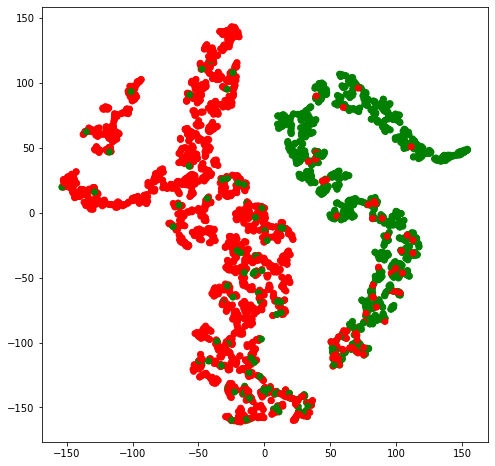

In [271]:
plt.figure(figsize=(8, 8)) 
plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [276]:
a = np.array([1,2,3])
b = np.array([1,2])

In [277]:
c = np.array([a,b])

In [278]:
c.shape

(2,)

In [280]:
c[1].shape

(2,)

In [281]:
type(c)

numpy.ndarray